# Predicting Weather - Time Series in Pandas

In [1]:
#import
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot

In [2]:
#Import data file
with open('input001.txt', 'r') as f:
    content = f.readlines()

In [3]:
#content

In [4]:
#strip and categorize data from file
startDate = [content[0].strip('\n')]
startDate = startDate[0]
endDate = [content[1].strip('\n')]
endDate = endDate[0]
nEntries = [content[2].strip('\n')]
nEntries = nEntries[0]
n = [content[-1].strip('\n')]
n = int(n[0])
temp = content[3:-1]
temperatures = []
for i in temp:
    temperatures.append(i.strip('\n'))

In [5]:
temperature = []
for i in temperatures:
    temperature.append(float(i))

In [6]:
#Make Date Range function that creates a dataframe using the daterange
new_df = pd.DataFrame()
def getdaterange(startDate, endDate):
    if startDate == endDate:
        newend = datetime.strptime(endDate,'%Y-%m-%d')
        newend = newend + timedelta(days=1)
        newend = newend.strftime('%Y-%m-%d')
        dates = pd.date_range(startDate, newend, freq='H')
        dates = dates.drop(dates[-1])
        new_df.insert(0, "Time", dates)
    else:
        dates = pd.date_range(startDate, endDate, freq='H')
        new_df.insert(0, "Time", dates)

In [7]:
#Execute the function
getdaterange(startDate, endDate)

In [8]:
#Add Temperature to DataFrame
df = new_df.copy()
df.insert(1, "Temperature", temperature)
df['Temperature']
df['Time'] = pd.to_datetime(df['Time'])
df.head(24)

,Time,Temperature
0,2013-01-01 00:00:00,34.38
1,2013-01-01 01:00:00,34.36
2,2013-01-01 02:00:00,34.74
3,2013-01-01 03:00:00,35.26
4,2013-01-01 04:00:00,35.23
5,2013-01-01 05:00:00,35.29
6,2013-01-01 06:00:00,35.64
7,2013-01-01 07:00:00,36.02
8,2013-01-01 08:00:00,36.10
9,2013-01-01 09:00:00,36.98


In [9]:
dates2 = pd.date_range('2013-01-01', '2013-01-02', freq='H')
dates2 = dates2.drop(dates2[-1])

In [10]:
temp_series = pd.Series(temperature, index=dates2)

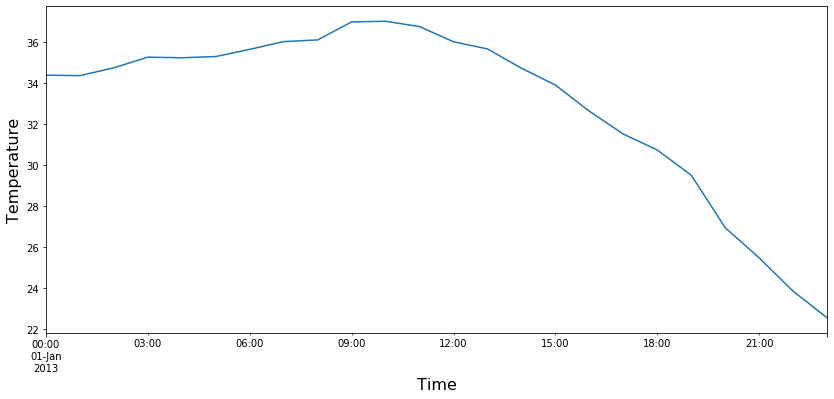

In [11]:
ax = temp_series.plot(figsize=(14,6))
ax.set_ylabel('Temperature', fontsize=16)
ax.set_xlabel('Time', fontsize=16)
plt.show()

In [12]:
#Make Date Range function that creates a dataframe using the daterange
dftofill = pd.DataFrame()
def getdaterange2(endDate, n):
        newdate = datetime.strptime(endDate,'%Y-%m-%d')
        
        newstart = newdate + timedelta(days=1)
        newstart = newstart.strftime('%Y-%m-%d')
        
        newend = newdate + timedelta(days=n+1)
        newend = newend.strftime('%Y-%m-%d')
        
        dates = pd.date_range(newstart, newend, freq='H')
        dates = dates.drop(dates[-1])
        
        dftofill.insert(0, "Time", dates)
        dftofill['Temperature'] = np.nan

In [13]:
getdaterange2(endDate, n)

In [14]:
dftofill.head()

,Time,Temperature
0,2013-01-02 00:00:00,NaN
1,2013-01-02 01:00:00,NaN
2,2013-01-02 02:00:00,NaN
3,2013-01-02 03:00:00,NaN
4,2013-01-02 04:00:00,NaN


In [15]:
missing_reading = dftofill[dftofill['Temperature'].isnull()]['Time'].values
missing_reading = missing_reading.astype('datetime64[h]').astype(int)
missing_reading = [[x] for x in missing_reading]
missing_reading = np.asarray(missing_reading)

## Modeling Data

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARMA

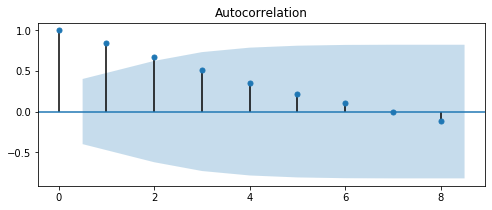

In [17]:
# Plot the ACF
fig, ax = plt.subplots(figsize=(8,3))
plot_acf(temp_series,ax=ax, lags=8);

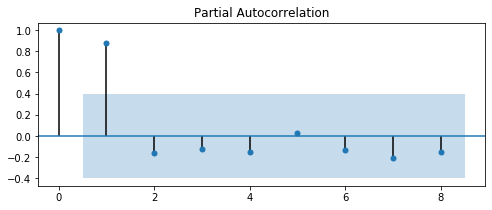

In [18]:
# Plot the PACF
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(figsize=(8,3))
plot_pacf(temp_series,ax=ax, lags=8);

In [19]:
# Fit an ARMA(1,0) model
mod_arma = ARMA(temp_series, order=(1,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   24
Model:                     ARMA(1, 0)   Log Likelihood                 -35.132
Method:                       css-mle   S.D. of innovations              0.970
Date:                Mon, 17 Aug 2020   AIC                             76.264
Time:                        13:25:37   BIC                             79.798
Sample:                    01-01-2013   HQIC                            77.201
                         - 01-01-2013                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.1073      5.515      5.277      0.000      18.297      39.917
ar.L1.y        0.9863      0.018     56.295      0.000       0.952       1.021
                                    Roots           

In [20]:
# Call plot_diagnostics() on the results calculated above 
res_arma.plot_diagnostics(figsize=(15, 18))
plt.show()

AttributeError: 'ARMAResults' object has no attribute 'plot_diagnostics'

In [22]:
# Get dynamic predictions with confidence intervals as above 
pred_dynamic_conf = pred_dynamic.conf_int()

NameError: name 'pred_dynamic' is not defined